In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_parquet('Code/testbed/test_results/test_results.parquet')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   datetime                     900 non-null    object 
 1   batch                        900 non-null    object 
 2   capacity                     900 non-null    object 
 3   confidence_deferral          900 non-null    bool   
 4   solver                       900 non-null    object 
 5   calibration                  900 non-null    bool   
 6   fp_cost                      900 non-null    float64
 7   fp_protected_penalty         900 non-null    int64  
 8   dynamic                      900 non-null    bool   
 9   target_fpr_disparity         900 non-null    float64
 10  fpr_learning_rate            900 non-null    int64  
 11  fpr_disparity_learning_rate  900 non-null    int64  
 12  acc                          900 non-null    float64
 13  tpr                 

In [12]:
df.head(1)

,datetime,batch,capacity,confidence_deferral,solver,calibration,fp_cost,fp_protected_penalty,dynamic,target_fpr_disparity,...,batch_seed,absence_rate,absence_seed,distribution,distribution_std,distribution_seed,deferral_rate,exp_pool,fpr_disp,fnr
0,2025-03-23 19:56,small,regular,True,individual,False,0.053706,0,False,1.2,...,1,0.0,NA,homogenous,NA,NA,0.2,all,0.31395,0.385154


In [4]:
cols = df.columns
print(len(cols))

35


In [5]:
for col in cols:
    print(df[col].value_counts())
    print('------------------------------------')

datetime
2025-03-23 19:57    123
2025-03-23 19:59    123
2025-03-23 19:58    122
2025-03-23 20:01    122
2025-03-23 20:02    122
2025-03-23 20:00    118
2025-03-23 20:03    105
2025-03-23 19:56     65
Name: count, dtype: int64
------------------------------------
batch
small    900
Name: count, dtype: int64
------------------------------------
capacity
regular    900
Name: count, dtype: int64
------------------------------------
confidence_deferral
True    900
Name: count, dtype: int64
------------------------------------
solver
individual    300
random        300
scheduler     300
Name: count, dtype: int64
------------------------------------
calibration
False    900
Name: count, dtype: int64
------------------------------------
fp_cost
0.053706    900
Name: count, dtype: int64
------------------------------------
fp_protected_penalty
0    900
Name: count, dtype: int64
------------------------------------
dynamic
False    900
Name: count, dtype: int64
---------------------------------

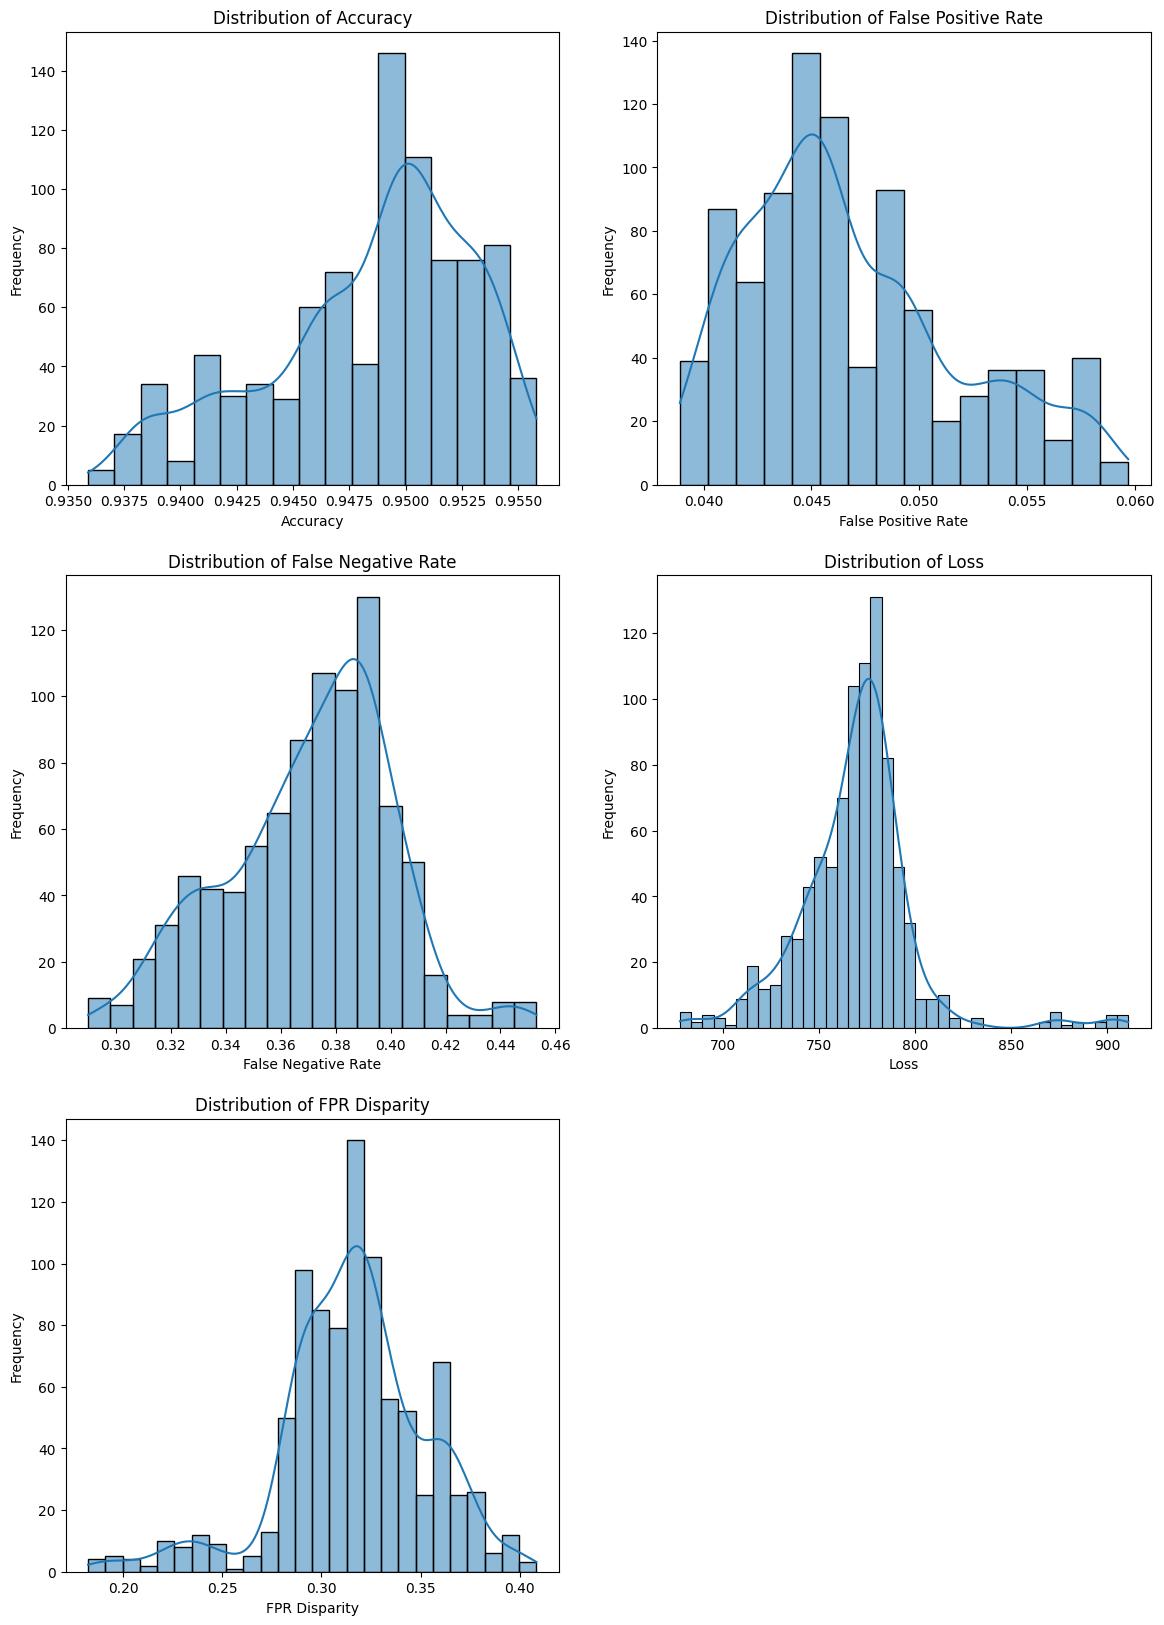

<Figure size 640x480 with 0 Axes>

In [6]:
plt.figure(figsize=(14, 20))

# Vẽ biểu đồ phân phối độ chính xác
plt.subplot(3, 2, 1)
sns.histplot(df['acc'], kde=True)
plt.title('Distribution of Accuracy')
plt.xlabel('Accuracy')
plt.ylabel('Frequency')

# Vẽ biểu đồ phân phối tỷ lệ dương tính giả
plt.subplot(3, 2, 2)
sns.histplot(df['fpr'], kde=True)
plt.title('Distribution of False Positive Rate')
plt.xlabel('False Positive Rate')
plt.ylabel('Frequency')

# Vẽ biểu đồ phân phối tỷ lệ âm tính giả
# Tính toán tỷ lệ âm tính giả
plt.subplot(3, 2, 3)
df['fnr'] = df['fn'] / (df['fn'] + df['tp'])
sns.histplot(df['fnr'], kde=True)
plt.title('Distribution of False Negative Rate')
plt.xlabel('False Negative Rate')
plt.ylabel('Frequency')

# Vẽ biểu đồ phân phối chi phí
plt.subplot(3, 2, 4)
sns.histplot(df['loss'], kde=True)
plt.title('Distribution of Loss')
plt.xlabel('Loss')
plt.ylabel('Frequency')

# Vẽ biểu đồ phân phối sự chênh lệch tỷ lệ dương tính giả
plt.subplot(3, 2, 5)
sns.histplot(df['fpr_disp'], kde=True)
plt.title('Distribution of FPR Disparity')
plt.xlabel('FPR Disparity')
plt.ylabel('Frequency')
plt.show()

# Hiển thị tất cả các biểu đồ
plt.tight_layout()
plt.show()

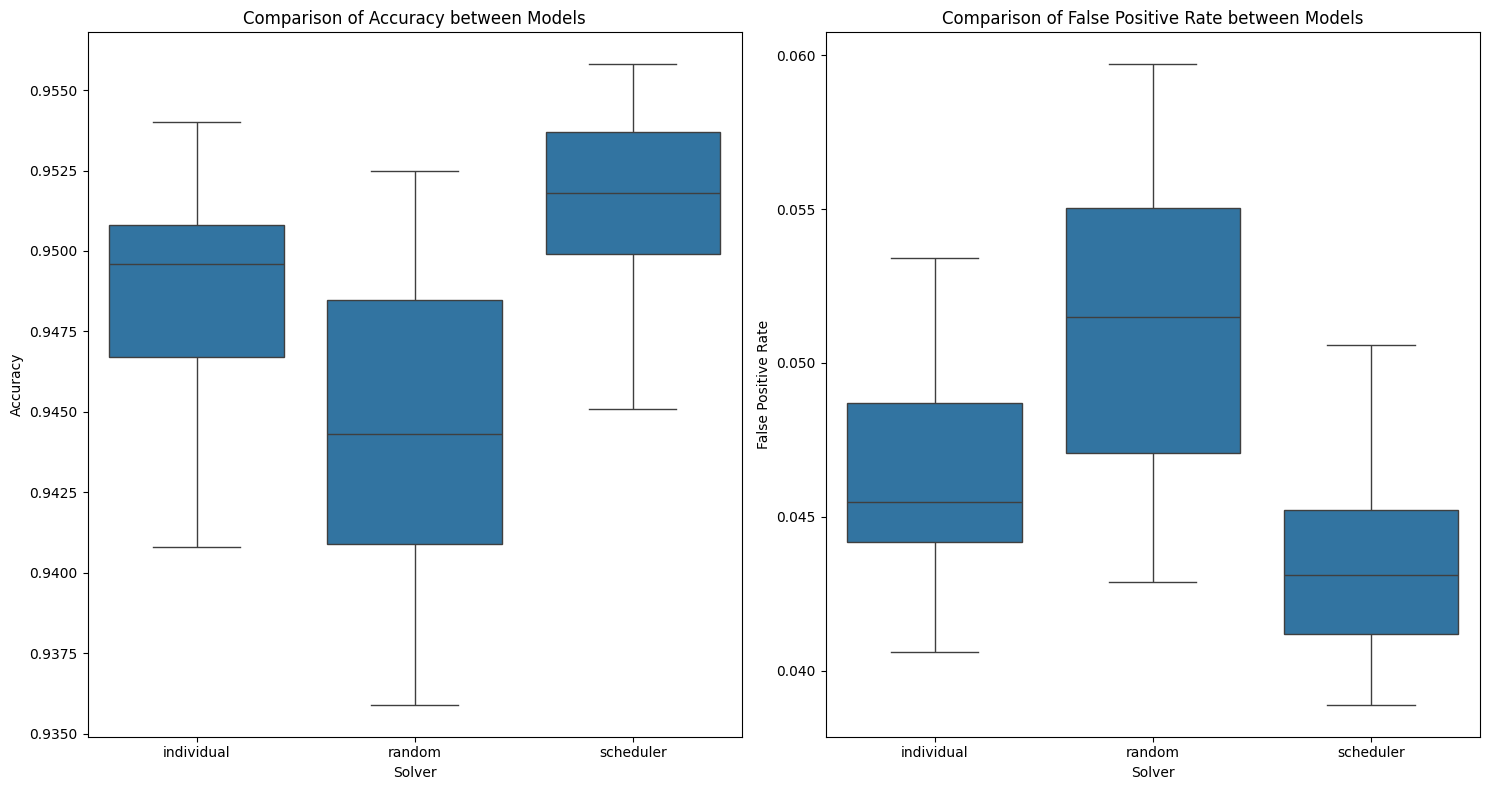

In [7]:
plt.figure(figsize=(15, 8))

# Vẽ biểu đồ so sánh độ chính xác giữa các mô hình
plt.subplot(1, 2, 1)
sns.boxplot(x='solver', y='acc', data=df)
plt.title('Comparison of Accuracy between Models')
plt.xlabel('Solver')
plt.ylabel('Accuracy')

# Vẽ biểu đồ so sánh tỷ lệ dương tính giả giữa các mô hình
plt.subplot(1, 2, 2)
sns.boxplot(x='solver', y='fpr', data=df)
plt.title('Comparison of False Positive Rate between Models')
plt.xlabel('Solver')
plt.ylabel('False Positive Rate')

# Hiển thị tất cả các biểu đồ
plt.tight_layout()
plt.show()

<Figure size 1000x1000 with 0 Axes>

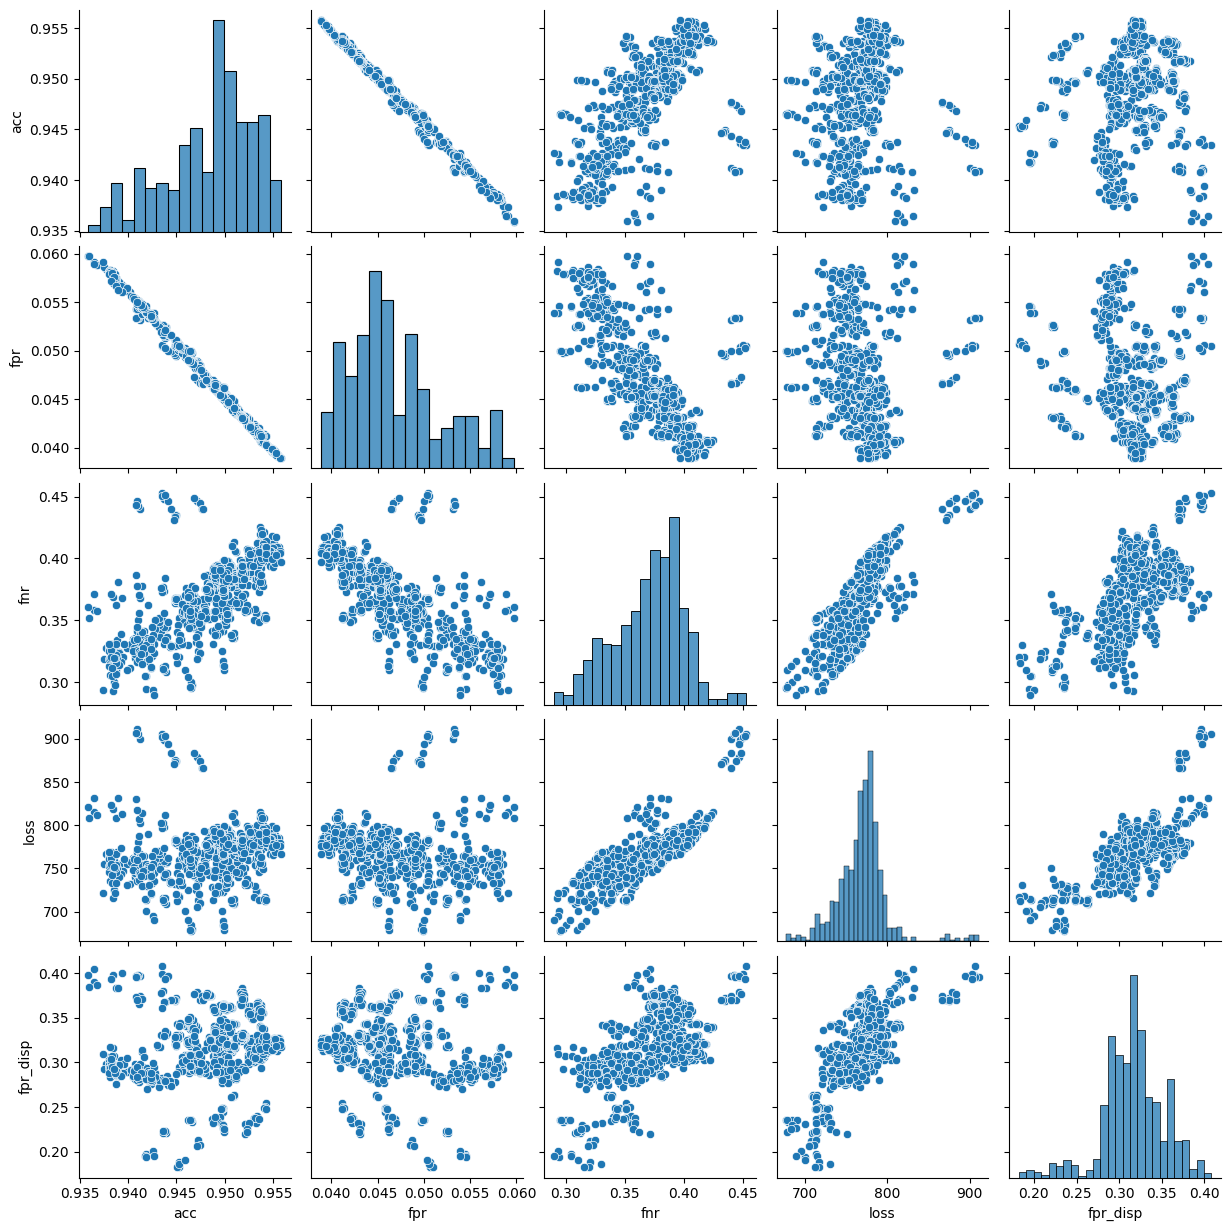

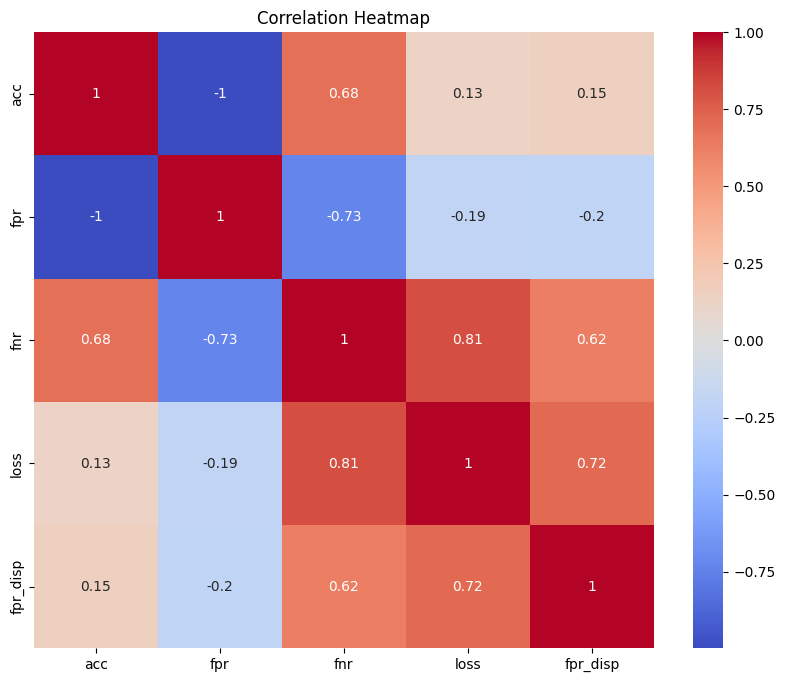

In [10]:
cols = ['acc', 'fpr', 'fnr', 'loss', 'fpr_disp']

plt.figure(figsize=(10, 10))
# Vẽ biểu đồ scatter plot để phân tích mối quan hệ giữa các cột
sns.pairplot(df[cols])
plt.show()

# Vẽ heatmap để phân tích mối quan hệ giữa các cột
plt.figure(figsize=(10, 8))
sns.heatmap(df[cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()